# MAT 201A Homework 1
Chengyuan Xu, 18 Spring

In [298]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load and reverse audio

In [299]:
from scipy.io import wavfile

In [300]:
filepath = './media/teresa_teng_16bit.wav'
sr, teresa = wavfile.read(filepath)

/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


_`wavfile.read` gives an error `WavFileWarning: Chunk (non-data) not understood`. Some say it's the extra metadata causing the issue. I decided not to deal with with file itself for now (because it's export from Audition in WAV PCM, quite standard) but try other approaches._

In [301]:
import wave
teresa = wave.open(filepath)
print(teresa)

In [302]:
params = teresa.getparams()
print("%d \n" % params.nframes)
bytes = teresa.readframes(params.nframes)
print(nframes)

# same issue with Wave_read.readframes(n) while there are
# extra metadata in the file as well. (shows b'')

488538 

b'\t\x00\x0b\x00\x0c\x00\x0c\x00\r\x00\x0f\x00\x10\x00\x12\x00\x12\x00\x14\x00'


In [303]:
# stripped off extra metadata from the wave file and use wavfile.read

filepath = './media/teresa_teng_16bit_no_meta.wav'
sampleRate, teresa = wavfile.read(filepath)

In [304]:
print(teresa)
print(type(teresa))
print(len(teresa))
print("Max = %d, min = %d" % (max(teresa), min(teresa)))

[0 1 0 ... 1 0 0]
<class 'numpy.ndarray'>
488538
Max = 24248, min = -28109


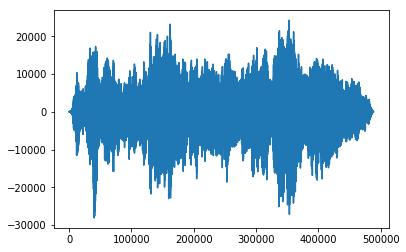

In [305]:
plot(teresa);

In [306]:
from IPython.display import Audio
Audio(filepath)

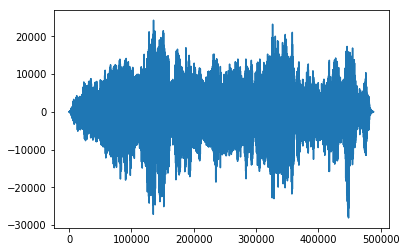

In [307]:
# reverse array in 2 ways

# backward = flip(teresa, 0)
backward = teresa[::-1]

plot(backward);

In [308]:
# wavfile.write('./media/backward.wav', sampleRate, backward)
# Audio('./media/backward.wav')
Audio(data=backward, rate=sampleRate) # improved based on Marc's code

### Make the every 500 ms reversed audio

In [309]:
sectionSize = int(sampleRate * (500 / 1000))
print("Each 500 ms section has %d samples" % sectionSize)

n = math.ceil(len(teresa) / sectionSize)
print("The sample will be divided into %d sections" % n)

Each 500 ms section has 22050 samples
The sample will be divided into 23 sections


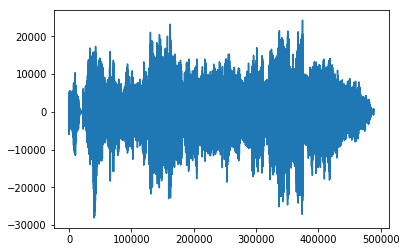

In [310]:
reverse500 = zeros_like(teresa)

for i in range(0, n):
    head = i * sectionSize
    tail = head + sectionSize
    tempSection = teresa[head : tail]
    
    # I misunderstood the question but why not.
    if i % 2 == 0:
        tempSection = flip(tempSection,0)
    
    reverse500[head:tail] = tempSection[:]

plot(reverse500);

In [311]:
Audio(data=reverse500, rate=sampleRate)

### Load, display and flip image

(1000, 1000)


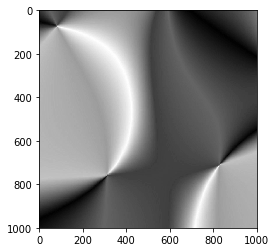

In [312]:
from PIL import Image
img = Image.open("./media/square.png").convert('L')
imgArr = asarray(img)
print(imgArr.shape)
imshow(imgArr, cmap='gray');

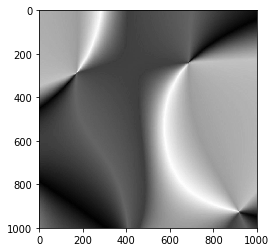

In [313]:
imgFlip = imgArr[:,::-1]
imgFlip = imgFlip[::-1]
imshow(imgFlip, cmap='gray');

### Flip into 10 by 10 checkerboard

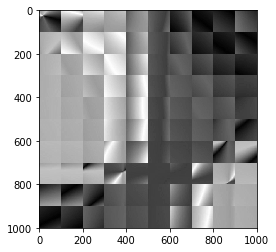

In [314]:
# improved based on Karl's code
checkerBoard = zeros_like(imgArr) 

for i in range(0, 10):
    for j in range(0, 10):
        row = i * 100
        col = j * 100
        box = imgArr[row:row+100, col:col+100]
        box = box[::-1,::-1]
        
        checkerBoard[row:row+100, col:col+100] = box
    
imshow(checkerBoard, cmap='gray');